In [1]:
#importing required libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns


In [2]:
#Loading data into dataframe

data = pd.read_csv("suicide_data.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
#Shape of dataframe

data.shape

(27820, 12)

In [4]:
#Listing the features of the dataset

data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [6]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
data.age_group.value_counts()

age_group
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: count, dtype: int64

In [8]:
data.generation.value_counts()

generation
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: count, dtype: int64

In [9]:
# Listing countries

country = data.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicide_count'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'suicide_rate'}>],
       [<Axes: title={'center': 'HDI for year'}>,
        <Axes: title={'center': 'gdp_per_capita'}>]], dtype=object)

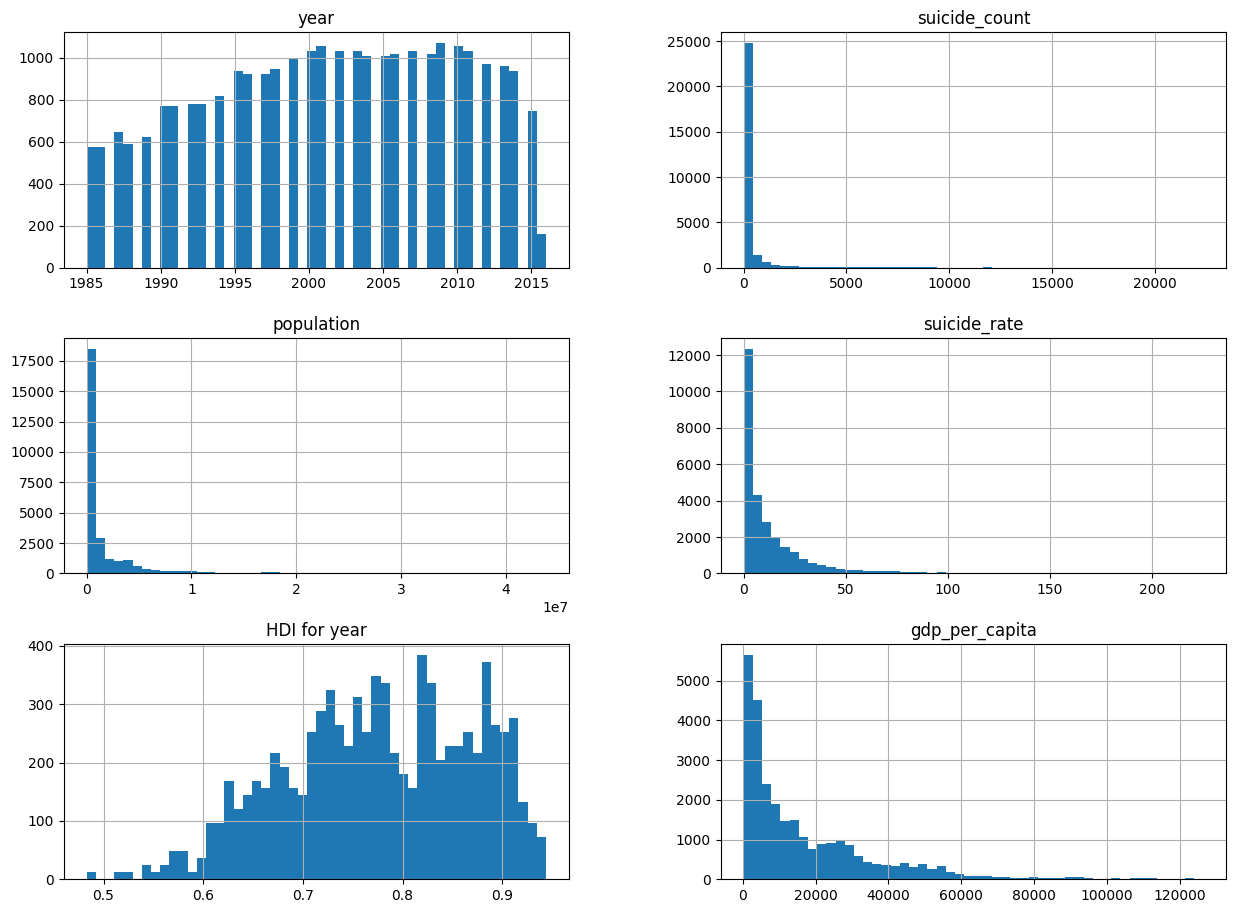

In [10]:
# Visualizing the data
data.hist(bins = 50,figsize = (15,11))

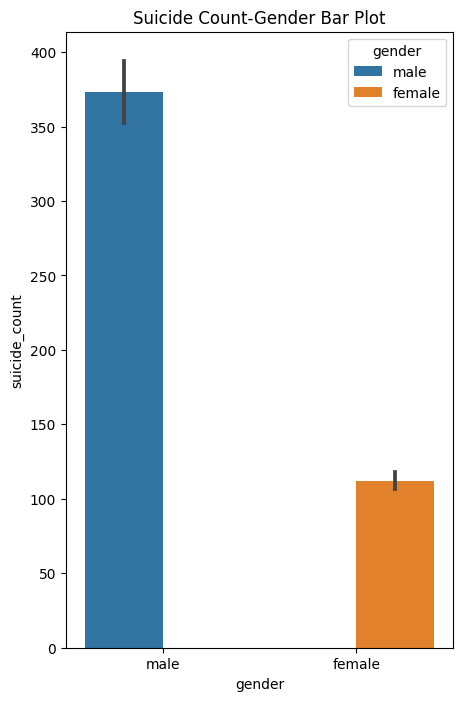

In [11]:
#Gender and suicide count bar plot

plt.figure(figsize=(5,8))
sns.barplot(x = "gender", y = "suicide_count", hue = "gender", data = data)
plt.title('Suicide Count-Gender Bar Plot')
plt.show()

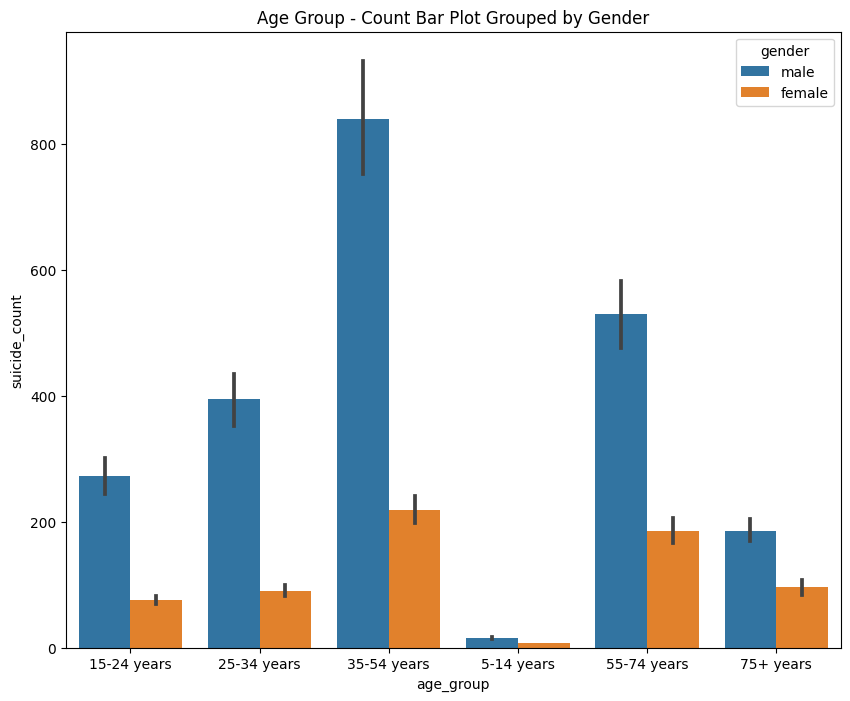

In [12]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,8))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = data, order = data["age_group"].sort_values().unique())
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

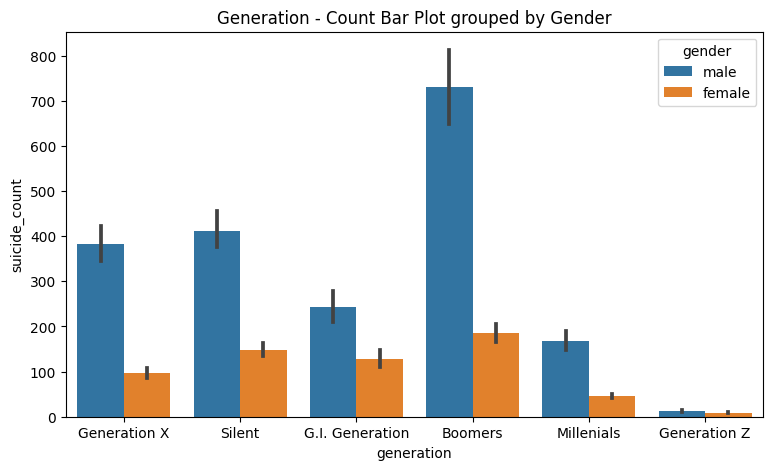

In [13]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = data)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

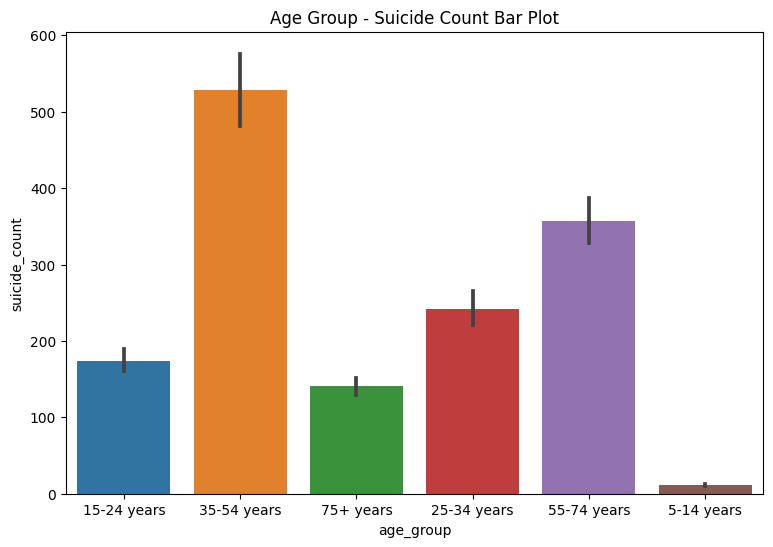

In [14]:
# Age Group and Suicide count bar plot

plt.figure(figsize=(9,6))
sns.barplot(x='age_group', y='suicide_count', data = data)
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

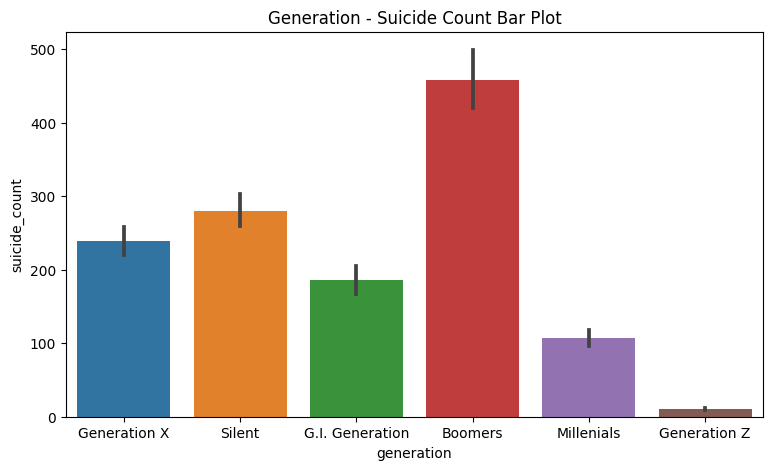

In [15]:
#Generation & Suicide Count Bar Plot

plt.figure(figsize=(9,5))
sns.barplot(x='generation', y='suicide_count',data=data)
plt.title('Generation - Suicide Count Bar Plot')
plt.show()

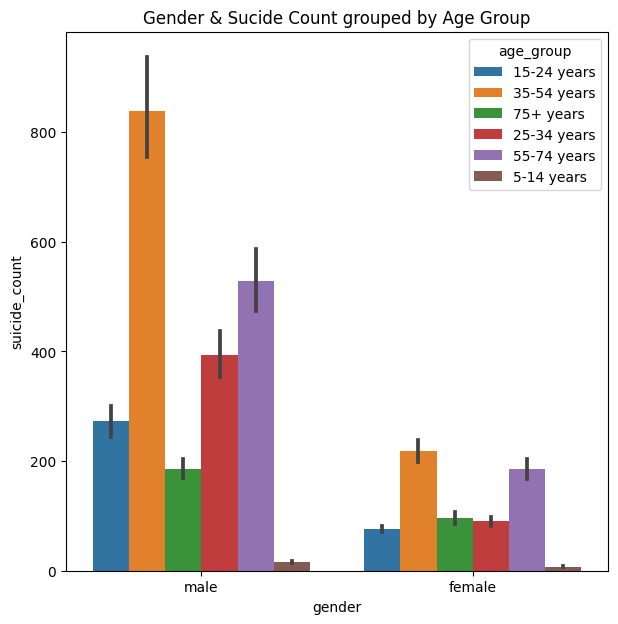

In [16]:
#Gender & Sucide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(x="gender", y="suicide_count", hue="age_group", data=data)
plt.title('Gender & Sucide Count grouped by Age Group')
plt.show()

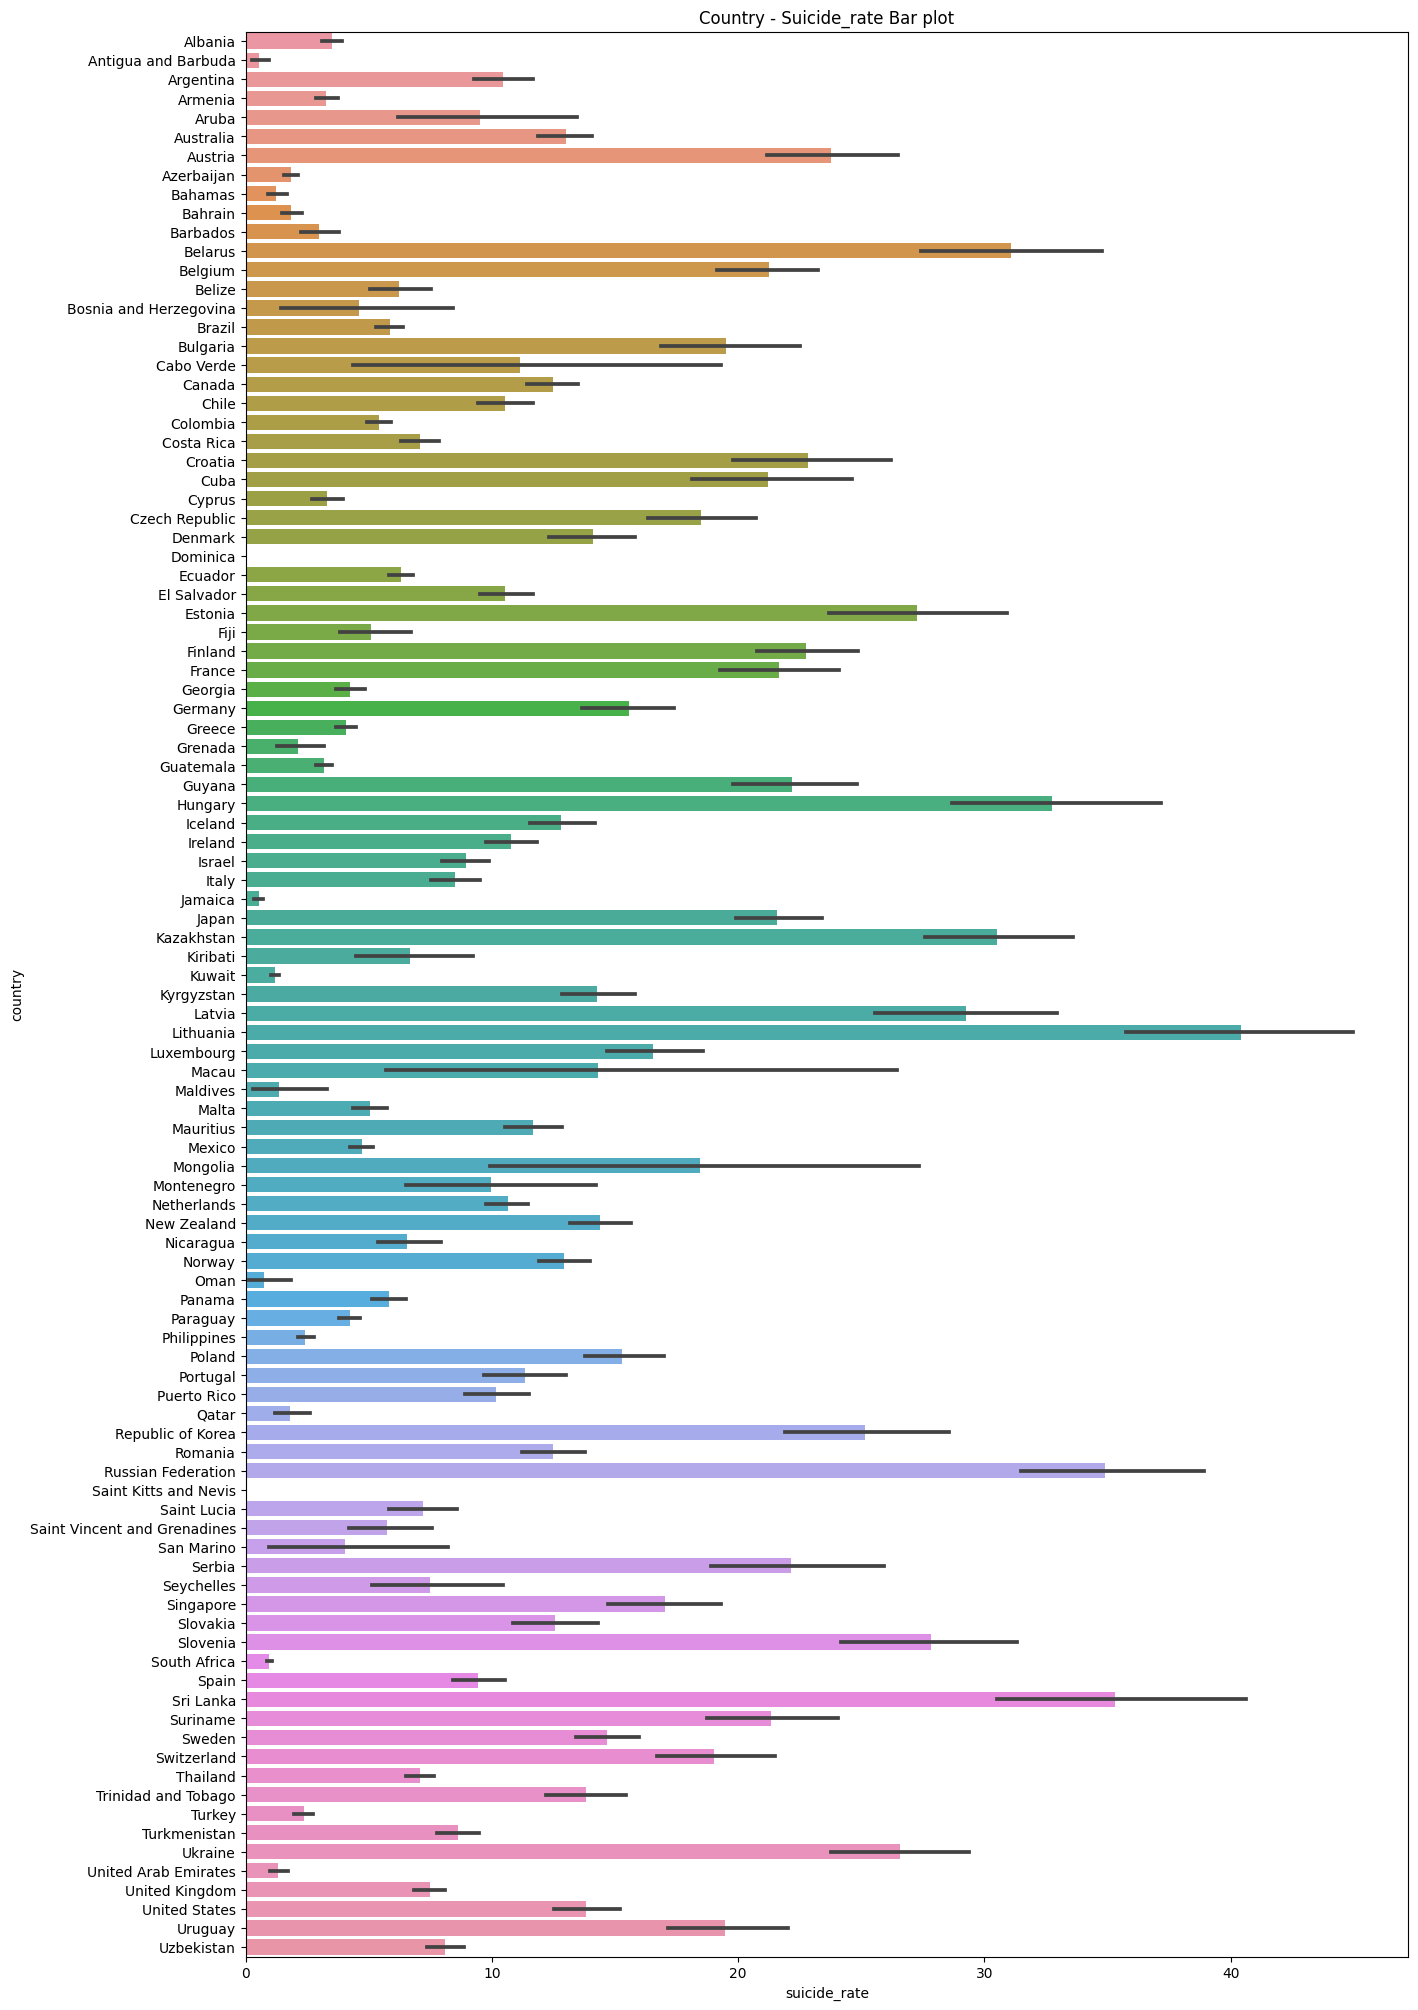

In [17]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

<Axes: xlabel='year'>

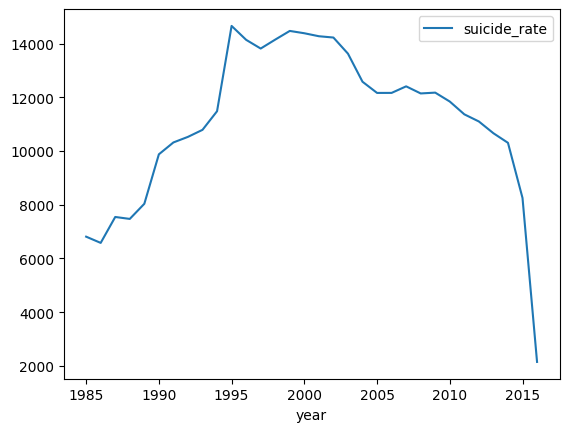

In [18]:
#Line plpot of year and suicide_rate

data[['year','suicide_rate']].groupby(['year']).sum().plot()

In [19]:

data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [20]:
#dropping the HDI for year column

data = data.drop(['HDI for year'], axis = 1)
data.shape

(27820, 11)

In [21]:
# The column country-year is just a combination of country and year columns. So dropping that column
#dropping the country-year for year column

data = data.drop(['country-year'], axis = 1)
data.shape

(27820, 10)

In [22]:
#droppinf off any null rows (is any)

data = data.dropna()
data.shape

(27820, 10)

In [23]:
#encoding the categorical features with LabelEncoder
"""The non-numerical labeled columns, country, year, gender, age_group and generation are to be converted to numerical labels that can be don by using SkLearn's LabelEncoder."""
from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age_group', 'gender', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [24]:
#Checking the data type of each column

data.dtypes

country             int64
year                int64
gender              int64
age_group           int64
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int64
dtype: object

In [25]:
# Converting the column 'gdp_for_year' to float from object

data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

RobustScaler is a preprocessing technique in scikit-learn, a popular machine learning library in Python. It scales features by removing the median and scaling the data according to the quantile range (i.e., the difference between the 75th and 25th percentiles). This technique is useful when there are outliers in the data that would otherwise skew the feature scaling using other techniques such as the StandardScaler.

By importing RobustScaler, the user can create an instance of this class and use it to preprocess their data before feeding it to a machine learning model.

In [26]:
#Scaling the numerical data columns with RobustScalar

numerical = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])

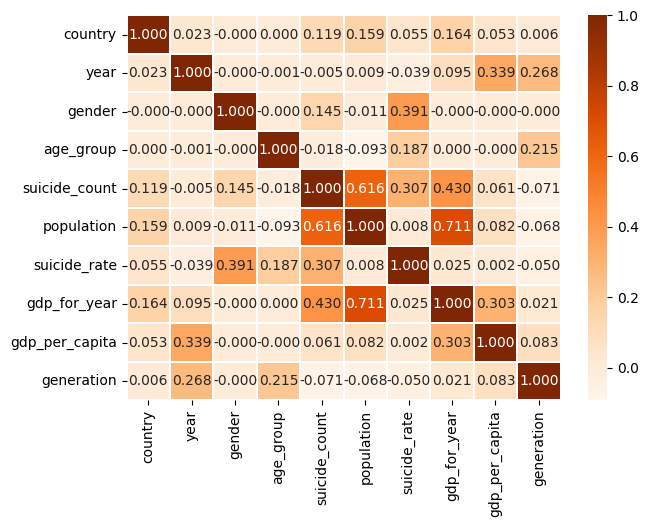

In [27]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Oranges', linewidths= .01, fmt=".3f")
plt.show()

In [28]:
# Splitting the Data:¶
# The data is split into train & test sets, 80-20 split.
# Sepratating & assigning features and target columns to X & y

y = data['suicide_rate']
X = data.drop('suicide_rate',axis=1)
X.shape, y.shape

((27820, 9), (27820,))

In [29]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 9), (5564, 9))

Decision Trees

In [30]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [31]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [32]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.967
Decision Tree: Accuracy on test Data: 0.952

Decision Tree: The RMSE of the training set is: 0.21965355867472555
Decision Tree: The RMSE of the testing set is: 0.271710722177092


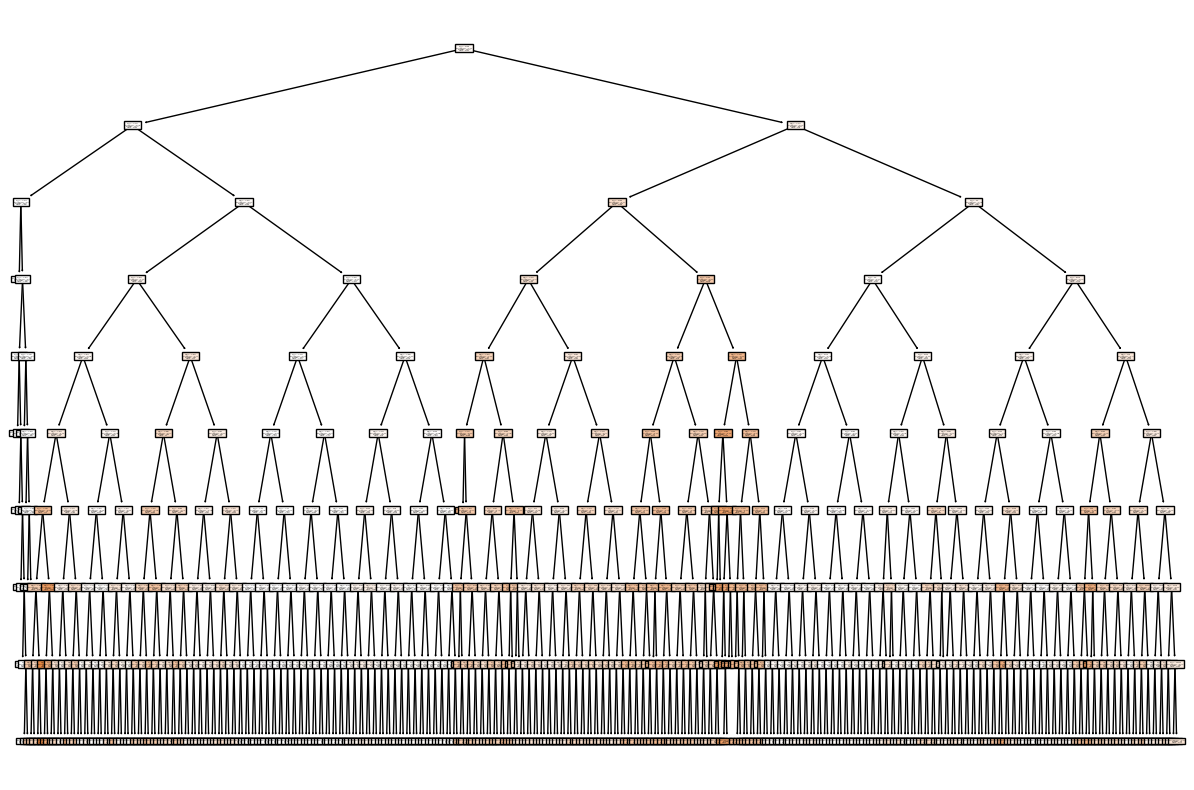

In [33]:
# plot the tree
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True)
plt.show()

SVM

In [34]:
#Import svm model
from sklearn import svm
from sklearn import preprocessing
#normalizing the dataset
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

#Create a svm Classifier
svr = svm.SVR() # on deafault rbf Kernel

#Train the model using the training sets
svr.fit(X_train, y_train)



SVR()

In [35]:
#predicting the target value from the model for the samples
y_test_svr = svr.predict(X_test)
y_train_svr = svr.predict(X_train)

In [37]:
#computing the accuracy of the model performance
acc_train_svr = svr.score(X_train, y_train)
acc_test_svr = svr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_train_svr))
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_test_svr))

print("SVM Regression: Accuracy on training Data: {:.3f}".format(acc_train_svr))
print("SVM Regression: Accuracy on test Data: {:.3f}".format(acc_test_svr))
print('\nSVM Regression: The RMSE of the training set is: ', rmse_train_svr)
print('SVM Regression: The RMSE of the testing set is: ', rmse_test_svr)

SVM Regression: Accuracy on training Data: 0.623
SVM Regression: Accuracy on test Data: 0.624

SVM Regression: The RMSE of the training set is:  0.7370833684537118
SVM Regression: The RMSE of the testing set is:  0.7582757218303541


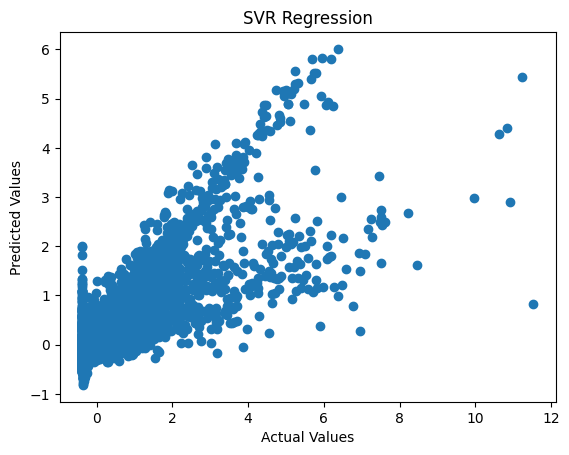

In [38]:
# plot predicted values against actual values
plt.scatter(y_test, y_test_svr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Regression')
plt.show()

Logistic Regression

In [39]:
from sklearn import preprocessing
from sklearn import utils
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

In [40]:
from sklearn.linear_model import LogisticRegression
# Create an instance of the LogisticRegression class
clf = LogisticRegression()

# Fit the training data to the model
clf.fit(X_train, y_transformed)



/home/ai/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_test = lab.fit_transform(y_test)
#predicting the target value from the model for the samples
y_test_log = clf.predict(X_test)
y_train_log = clf.predict(X_train)

#computing the accuracy of the model performance
acc_train_log = clf.score(X_train, y_transformed)
acc_test_log = clf.score(X_test, y_test)

rmse_train_log = np.sqrt(mean_squared_error(y_transformed, y_train_log))
rmse_test_log = np.sqrt(mean_squared_error(y_test, y_test_log))

print("Logistic regression: Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic regression: Accuracy on test Data: {:.3f}".format(acc_test_log))
print('\nLogistic regression: The RMSE of the training set is:', rmse_train_log)
print('Logistic regression: The RMSE of the testing set is:', rmse_test_log)





Logistic regression: Accuracy on training Data: 0.160
Logistic regression: Accuracy on test Data: 0.157

Logistic regression: The RMSE of the training set is: 1303.971599511605
Logistic regression: The RMSE of the testing set is: 885.2266774611218


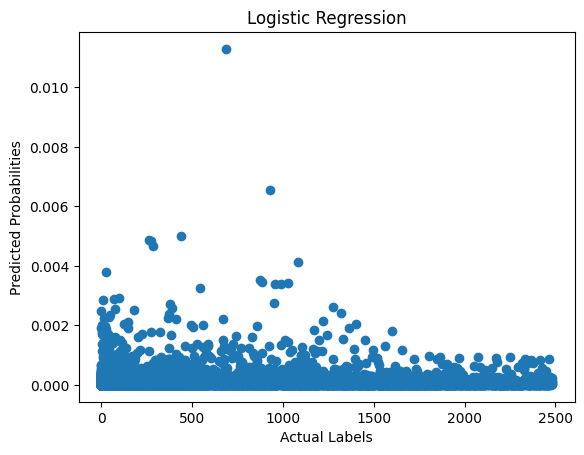

In [42]:
# predict probabilities using the model
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# plot predicted probabilities against actual binary labels
plt.scatter(y_test, y_pred_prob)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Probabilities')
plt.title('Logistic Regression')
plt.show()

After analyzing the performance of three different models on the given dataset, it can be concluded that the Decision Tree model outperformed both the SVM regression and Logistic regression models. The Decision Tree model achieved a high accuracy of 0.967 on the training data and 0.951 on the testing data, indicating that it can predict suicide rates accurately. Additionally, the RMSE of the training set is 0.219, which is less than the RMSE of the testing set, 0.272, implying that the model does not overfit.

On the other hand, the SVM regression model performed poorly compared to the decision tree. The accuracy of the model on both the training and testing data is around 0.62, indicating that the model is not a good fit for the given data. Additionally, the RMSE of the training set is 0.737, which is higher than the RMSE of the testing set, 0.758, indicating that the model overfits the data.

Finally, the Logistic regression model also performed poorly, with a low accuracy of 0.154 on both the training and testing data. Moreover, the RMSE of the training set is 1427.342, which is significantly higher than the RMSE of the testing set, 949.210, indicating that the model overfits the data.

Therefore, it is recommended to use the Decision Tree model to predict suicide rates for the given dataset.